## Importing Libraries :

In [1]:
import cv2 # (Open Source Computer Vision) 
import random
import pywt # PyWavelets - Wavelet Transforms in Python
from numpy import dot,zeros,array,ndarray,resize,uint8 #(uint8 is Unsigned integer (0 to 255))
from scipy.linalg import svd #SVD is usually described for the factorization of a 2D matrix A.
import numpy as np
import matplotlib.pyplot as plt 
import os # this provides functions for creating and removing a directory (folder), operating system
import warnings
warnings.filterwarnings("ignore")

## [A] Adding watermark in video : 

## [1] Location :

In [2]:
location =  r"C:\Users\sonuk\OneDrive\Documents\DSP_PROJECT_DATASET"

## [2] Extract Frame : 

In [3]:
# Function to extract frames 
def FrameCapture_embedd(path): 
    frames = []
    red_frames =[]
    green_frames = []
    blue_frames = []
    video = cv2.VideoCapture(path)  # an object of VideoCapture class
    
    count = 0
    success = 1
    while success: #  # Inside the while loop, we are reading the video frame by frame
        success, frame = video.read() # reading a Video from the camera frame by frame
        if success:
            frames.append(frame)
            # opencv reads the images as BGR instead of RGB
            b,g,r = cv2.split(frame) # split every frmae in RGB format using split 
            red_frames.append(r)
            green_frames.append(g)
            blue_frames.append(b)
            count += 1  
    # creating a random frame 
    rf = random.choice(frames)
    # get video property 
    if video.isOpened():
        width  = int(video.get(cv2.CAP_PROP_FRAME_WIDTH)) #  width of video 
        height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))  #  height of video
        fps= int(video.get(cv2.CAP_PROP_FPS)) # frame per second in video

    size = (width, height)
    print("size of video:",size)
    print("No of frames in per second is:", fps)
    print("total number of frame:",count)
    
    # storing random frame on particular location by using os 
    cv2.imwrite(os.path.join(location , 'Random_Frame.png'),rf)
    # making one list to show output of RGB frame using index 0 
    lst = [red_frames[0],green_frames[0],blue_frames[0]]
    name = ["red frame",'green frame',"blue frame"]
    fig, axs = plt.subplots(1,3, figsize=(10,10))
    c =1
    for k in range(len(lst)):
        fig.set_facecolor("white") 
        plt.subplot(1,3,c)
        plt.imshow(lst[k])
        plt.title(str(name[k]))
        plt.axis('off')
        c =c+1 
    return count,red_frames, green_frames, blue_frames,rf


#Perfprming frame subtraction by selecting random frame from each channel and subtracting it over all channels
def Frame_Subtract_embedd(nof,Red,Green,Blue,rf):
    SR = []
    SG = []
    SB = []
    rb,rg,rr = cv2.split(rf) # spliting random frame in RGB format

    for i in range(0,nof,1):
        SR.append(cv2.subtract(Red[i],rr)) # subtracting original frame from random frame
        SG.append(cv2.subtract(Green[i],rg))
        SB.append(cv2.subtract(Blue[i],rb))
    
    # taking first frame for plotting out of 300
    lst = [SR[0],SG[0],SB[0]]
    name = ["red subtracted frame",'green subtracted frame',"blue subtracted frame"]
    fig, axs = plt.subplots(1,3, figsize=(10,10))
    c =1
    for k in range(len(lst)):
        fig.set_facecolor("white") 
        plt.subplot(1,3,c)
        plt.imshow(lst[k])
        plt.title(str(name[k]))
        plt.axis('off')
        c =c+1 
    return SR,SG,SB


size of video: (352, 264)
No of frames in per second is: 30
total number of frame: 300


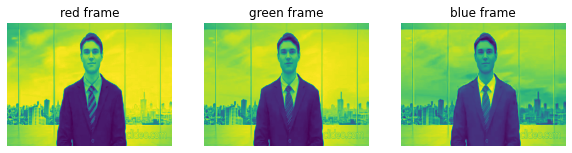

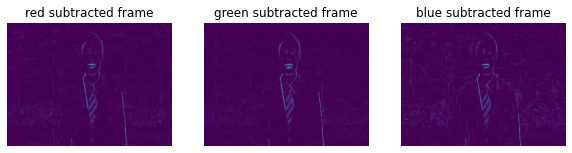

In [4]:
#Splitting the video frames and then splitting them into RGB frame
video_file = "original_video.mp4"
no_of_frame,R,G,B,random_frame = FrameCapture_embedd(video_file)
#Performing frame subtraction on all the channels and returning them as lists
sbtract_rf,sbtract_gf,sbtract_bf = Frame_Subtract_embedd(no_of_frame,R,G,B,random_frame)

# [3] Apply DWT On Frame :

In [5]:
#Function that applies DWT twice on the frames 
def ApplyDWT_Frames(rf):
    b,g,r = cv2.split(rf) # spkiting random frame 
    
    lst = [rf,r,g,b]
    name = ["random frame","random red frame",'random green frame'," random blue frame"]
    fig, axs = plt.subplots(1,4, figsize=(10,10))
    c =1
    for k in range(len(lst)):
        fig.set_facecolor("white") 
        plt.subplot(1,4,c)
        plt.imshow(lst[k])
        plt.title(str(name[k]))
        plt.axis('off')
        c =c+1 
    # Taking the original matrix and taking the cA(LL) values from DWT
    # LL consists of the approximation part of the original frame.
    # HH resolution levels consist of the detail parts
    LLR1,HHR1 = pywt.dwt(r,'db1')
    LLG1,HHG1 = pywt.dwt(g,'db1')
    LLB1,HHB1 = pywt.dwt(b,'db1')
    mat = pywt.idwt(LLR1,HHR1,'db1') # reconstructing frame usinf LLR1 and HHR1
    
    # DWT applied twice on frames (once on normal and then on LL sub band.) Returning the HH sub bands
    LLR2,HHR2 = pywt.dwt(LLR1,'db1')
    LLG2,HHG2 = pywt.dwt(LLG1,'db1')
    LLB2,HHB2 = pywt.dwt(LLB1,'db1')
    mat2 = pywt.idwt(LLR2,HHR2,'db1')
    # plotting dwt taken frames 
    lst = [LLR1,HHR2,LLG1,HHG2,LLB1,HHB2,mat,mat2]
    name = ["low red 1"," high red 2",'low green1',"high green2","low blue1","high blue2","low reconstructed","high reconstruct"]
    fig, axs = plt.subplots(2,4, figsize=(15,15))
    c =1
    for k in range(len(lst)):
        fig.set_facecolor("white") 
        plt.subplot(2,4,c)
        plt.imshow(lst[k])
        plt.title("level "+str(name[k])+" DWT frame")
        plt.axis('off')
        c =c+1 

    return LLR1,HHR1,LLR2,HHR2,LLG1,HHG1,LLG2,HHG2,LLB1,HHB1,LLB2,HHB2
        

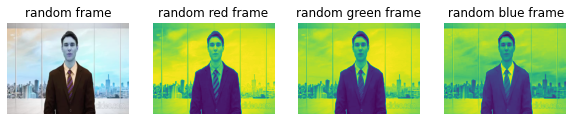

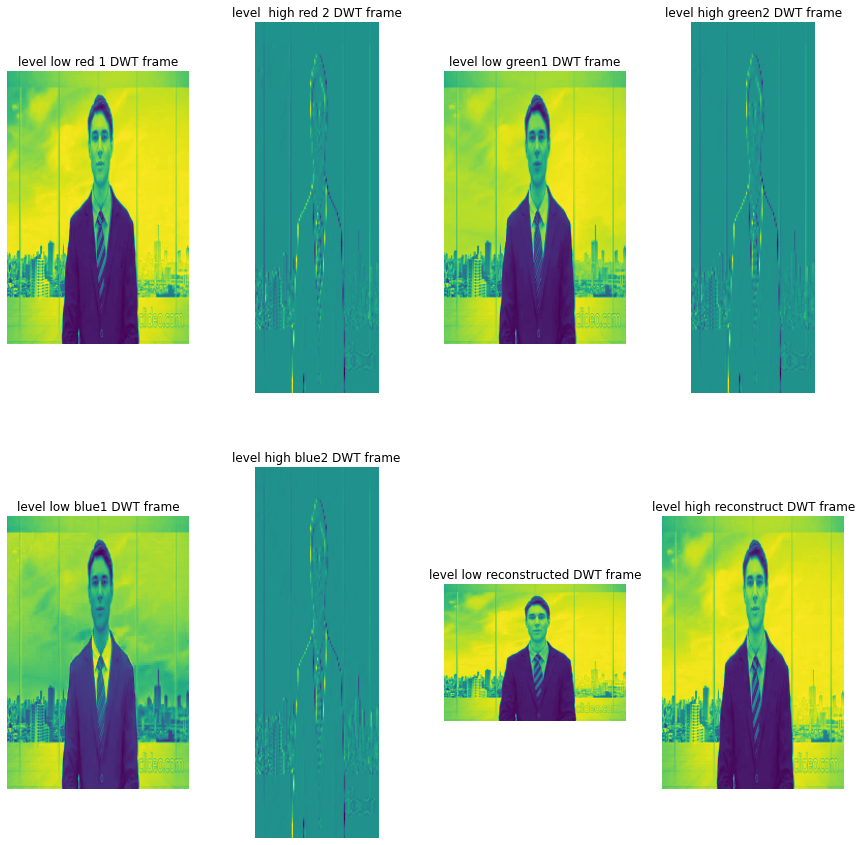

In [6]:
#Applying two rounds of DWT on the random frame
LLR1,HHR1,LLR2,HHR2,LLG1,HHG1,LLG2,HHG2,LLB1,HHB1,LLB2,HHB2 = ApplyDWT_Frames(random_frame)

## [4] Apply DWT On Logo Image :

In [7]:
#Applying two rounds of DWT to the logo image
def ApplyDWT_Logo(path):
    wmk_image = cv2.imread(path) # reading image path
    cv2.imwrite(os.path.join(location , 'logo_used.png'),wmk_image) # storing logo image on specified loaction 
    gray_wmk = cv2.cvtColor(wmk_image,cv2.COLOR_BGR2GRAY) # convrting image from rgb to gray 
    LL1,HH1= pywt.dwt(gray_wmk,'db1') # applying dwt on logo image 
    LL2,HH2 = pywt.dwt(LL1,'db1') # applying 2 time dwt on logo image 
    
    # plotting logo image 
    lst = [wmk_image,HH2]
    name = ["original logo image","DWT applied on logo image"]
    fig, axs = plt.subplots(2,1, figsize=(10,30))
    c =1
    for k in range(len(lst)):
        fig.set_facecolor("white") 
        plt.subplot(2,1,c)
        plt.imshow(lst[k])
        plt.title(str(name[k]))
        plt.axis('off')
        c =c+1 
    return HH2


True

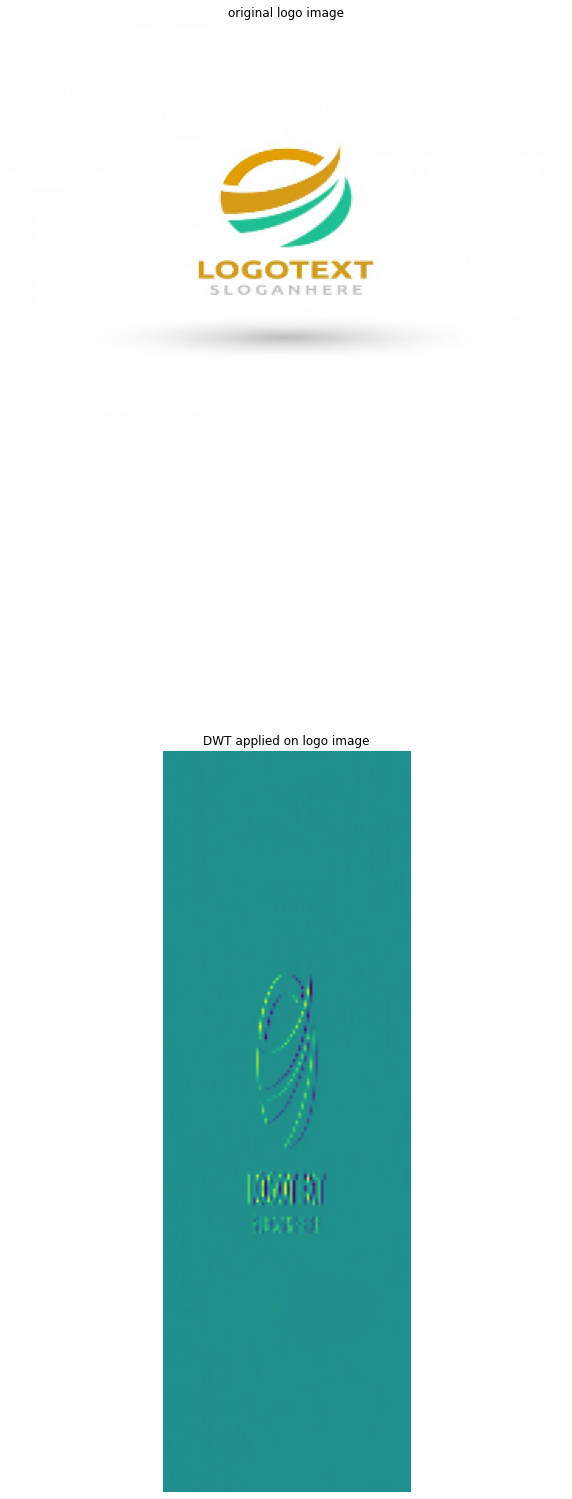

In [8]:
# Applying DWT once on the splitted logo and acquiring the HH sub band
a2 = ApplyDWT_Logo('LOGO_1.png')
cv2.imwrite(os.path.join(location , 'dft_on_logo.png'),a2)


## [5] Apply SVD :

In [11]:
# Function to apply SVD on the matrice passed as a parameter
# SVD packs the maximum signal energy into as few coefficients as possible by spliting them in LI components. 
def SVD_embedd(mat):
    U, S, VT = svd(mat, full_matrices=True)
    return U,S,VT

#Function to add the singular matrix S
# Singular value eventually conserves most energy 
# and it also gives better quality result after applying various attacks 
def Singular_S_Adder(s1,s2):
    s3 = s1+s2
    return s3

In [12]:
#Applying SVD on the random frame
u1,s1,vt1 = SVD_embedd(HHR2)
u2,s2,vt2 = SVD_embedd(HHG2)
u3,s3,vt3 = SVD_embedd(HHB2)  
# Applying SVD once on the HH sub DWT-ized logo
u4,s4,vt4 = SVD_embedd(a2)
#Now adding the singular matrices of frame and logo 
# here s4 is diagonal matrix of logo image 
add_s1 = Singular_S_Adder(s1,s4)
add_s2 = Singular_S_Adder(s2,s4)
add_s3 = Singular_S_Adder(s3,s4)

## [6] Inverse SVD :

In [13]:
#Function to calculate inverse SVD for decompressing 
def Inverse_SVD_embedd(u1,vt1,u2,vt2,add_s):
    m,_ = u1.shape # first m columns of the U matrix 
    n,_ = vt1.shape #  first n rows of the V^T matrix
    S = zeros((m,n))
    for i in range(min(m,n)):
        S[i,i] = add_s[i]
    B = dot(u1,dot(S,vt1)) # B = U1*S*V^T
    return B


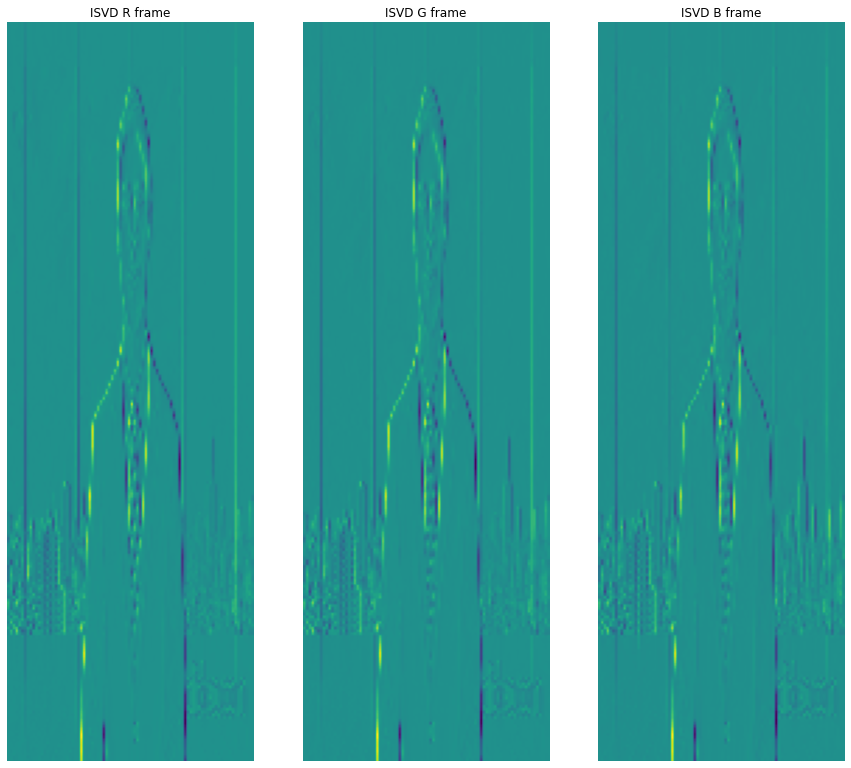

In [14]:
# Reconstructing three SVD matrixes for R,G and B channels separately
# here u4 and vt4 is rotation matic of logo image
dR_reconstr_svd = Inverse_SVD_embedd(u1,vt1,u4,vt4,add_s1)
dG_reconstr_svd = Inverse_SVD_embedd(u2,vt2,u4,vt4,add_s2)
dB_reconstr_svd = Inverse_SVD_embedd(u3,vt3,u4,vt4,add_s3)
lst =[dR_reconstr_svd,dG_reconstr_svd,dB_reconstr_svd]
name=["ISVD R frame","ISVD G frame","ISVD B frame"]
fig, axs = plt.subplots(1,3, figsize=(15,20))
c =1
for k in range(len(lst)):
    fig.set_facecolor("white") 
    plt.subplot(1,3,c)
    plt.imshow(lst[k])
    plt.title(str(name[k]))
    plt.axis('off')
    c =c+1 


## [7] Inverse DWT :

In [15]:
#Function to calculate inverse DWT
def IDWT_embedd(reconstr_svd,LL_2,HH_1):
    idwt_2_level = pywt.idwt(LL_2,reconstr_svd,'db1') # doing idwt on reconstrued svd and 2 level LL subband 
    water = pywt.idwt(idwt_2_level,HH_1, 'db1') # again doing idwt on idwt_2_level and HH subband level 1
    return water

Text(0.5, 1.0, 'Watermark_image')

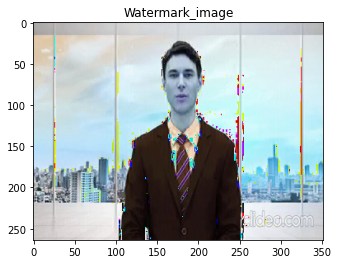

In [16]:
# Treat these matrices as HH value and compute the inverse DWT twice on them
eR = IDWT_embedd(dR_reconstr_svd,LLR2,HHR1)
eG = IDWT_embedd(dG_reconstr_svd,LLG2,HHG1)
eB = IDWT_embedd(dB_reconstr_svd,LLB2,HHB1)

# Merging the watermarked channels after Inverse DWT
merged_water_channel = cv2.merge((eB,eG,eR)).astype(np.uint8)

fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white") 
plt.imshow(merged_water_channel,cmap=plt.cm.gray)
plt.title("Watermark_image")

In [17]:
cv2.imwrite(os.path.join(location , 'watermark_embedd_image.png'),merged_water_channel)

True

## [8] Adding Watermark On Each Channel :

In [18]:
#Function to add the watermark on each channel of subtracted frames
def Add_to_Subtracted_Frames_embedd(water_frame_new,sbrf,sbgf,sbbf,nof):
    wmkd_frames = []
    for i in range(0,nof,1):
        sub = cv2.merge((sbbf[i],sbgf[i],sbrf[i]))
        t = cv2.add(sub,water_frame_new)
        wmkd_frames.append(t)
    return wmkd_frames


In [19]:
# Adding the watermarked frame to the subtracted frames
watermarked_frames_video = Add_to_Subtracted_Frames_embedd(merged_water_channel,sbtract_rf,sbtract_gf,sbtract_bf,no_of_frame)

## [9] Create Watermark Video :

###### AVI files can contain both audio and video data in a file container that allows synchronous audio-with-video playback. "AVI". FullForms Audio Video Interleave (also Audio Video Interleaved).

Then we write one by one frame in the output.avi file.

In [20]:
def Create_Video_From_Frames(wmkd_frames):
    fps = 30
    x,y,z = wmkd_frames[0].shape
    size = (y,x)
    out =  cv2.VideoWriter(os.path.join(location , 'news_Watermarked_Video.avi',), cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in range(0,len(wmkd_frames)): # considering all frame 
        out.write(wmkd_frames[i])
    out.release()

## [10] OUTPUT  : 

In [21]:
# Creating video using these watermarked frames
output = Create_Video_From_Frames(watermarked_frames_video)

## [B] Extracting Watermark :

## [1] Extract Frame From Watermark Video :

In [22]:
# Function to extract frames 
def FrameCapture_extract(path): 
    video = cv2.VideoCapture(path)  
    count = 0
    success = 1
    success, image = video.read()
    b,g,r = cv2.split(image)
    
    width  = int(video.get(cv2.CAP_PROP_FRAME_WIDTH)) #  width
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))  #  height
    fps= int(video.get(cv2.CAP_PROP_FPS)) # frame per second 
    size = (width, height)
    print("size of video:",size)
    print("No of frames in per second is:", fps)
    
    return r,g,b 

size of video: (352, 264)
No of frames in per second is: 30


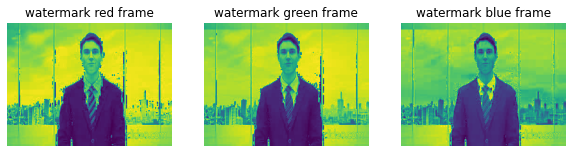

In [23]:
#Taking the first frame of watermarked video and splitting it into R,G and B channels
rw_extr,gw_extr,bw_extr = FrameCapture_extract("news_Watermarked_Video.avi")
# taking first frame for plotting out of 300
lst = [rw_extr,gw_extr,bw_extr]
name = ["watermark red frame",'watermark green frame',"watermark blue frame"]
fig, axs = plt.subplots(1,3, figsize=(10,10))
c =1
for k in range(len(lst)):
    fig.set_facecolor("white") 
    plt.subplot(1,3,c)
    plt.imshow(lst[k])
    plt.title(str(name[k]))
    plt.axis('off')
    c =c+1 


## [2] Apply DWT On Watermark Frame :

In [24]:
def DWT_extr(redframe,greenframe,blueframe):
    # applying dwt on normal watermarked image
    LLR1,_ = pywt.dwt(redframe,'db1')
    LLG1,_ = pywt.dwt(greenframe,'db1')
    LLB1,_ = pywt.dwt(blueframe,'db1')
    # applying dwt on lL band returning HH sub bands 
    _,HHR2 = pywt.dwt(LLR1,'db1')
    _,HHG2 = pywt.dwt(LLG1,'db1')
    _,HHB2 = pywt.dwt(LLB1,'db1')
  
    return HHR2,HHG2,HHB2

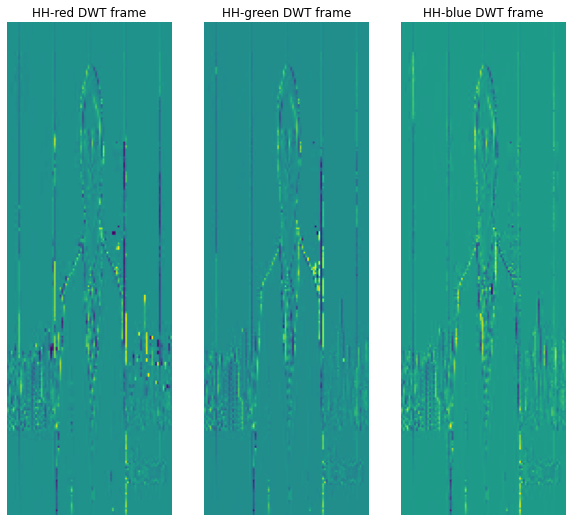

In [25]:
#Applying DWT twice on the frame
HHWR_extr,HHWG_extr,HHWB_extr = DWT_extr(rw_extr,gw_extr,bw_extr)
# plotting LL band or watermarked frame
lst = [HHWR_extr,HHWG_extr,HHWB_extr]
name = ["HH-red DWT frame",'HH-green DWT frame',"HH-blue DWT frame"]
fig, axs = plt.subplots(1,3, figsize=(10,10))
c =1
for k in range(len(lst)):
    fig.set_facecolor("white") 
    plt.subplot(1,3,c)
    plt.imshow(lst[k])
    plt.title(str(name[k]))
    plt.axis('off')
    c =c+1 

## [3] Apply SVD On Watermark Frame :

In [26]:
def SVD_extr(mat):
    U,S,VT = svd(mat,full_matrices=True)
    return U,S,VT

In [27]:
#Applying SVD on the HH sub band of watermarked frame
uwr,swr,vtwr = SVD_extr(HHWR_extr)
uwg,swg,vtwg = SVD_extr(HHWG_extr)
uwb,swb,vtwb = SVD_extr(HHWB_extr)

## [4] Extract Frame From Non-Watermark Video :

size of video: (352, 264)
No of frames in per second is: 30


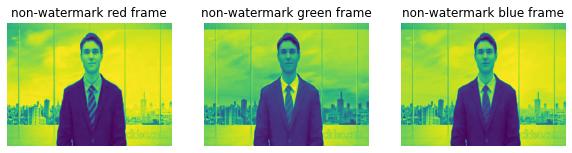

In [28]:
#Taking the first frame of the non-watermarked video
rnw,bnw,gnw = FrameCapture_extract("original_video.mp4")

# taking first frame for plotting out of 300
lst = [rnw,gnw,bnw]
name = ["non-watermark red frame",'non-watermark green frame',"non-watermark blue frame"]
fig, axs = plt.subplots(1,3, figsize=(10,10))
c =1
for k in range(len(lst)):
    fig.set_facecolor("white") 
    plt.subplot(1,3,c)
    plt.imshow(lst[k])
    plt.title(str(name[k]))
    plt.axis('off')
    c =c+1 


## [5] Applying DWT And SVD On Non-Watermark Frame :

In [29]:
#Applying DWT twice on the non-watermarked frame
HHNWR,HHNWG,HHNWB = DWT_extr(rnw,gnw,bnw)
    
#Applying SVD on the non-watermarked frame
unwr,snwr,vtnwr = SVD_extr(HHNWR)
unwg,snwg,vtnwg = SVD_extr(HHNWG)
unwb,snwb,vtnwb = SVD_extr(HHNWB)


## [6] Subtracting SVD Value Of Watermarked Or Non-Watermarked Frame :

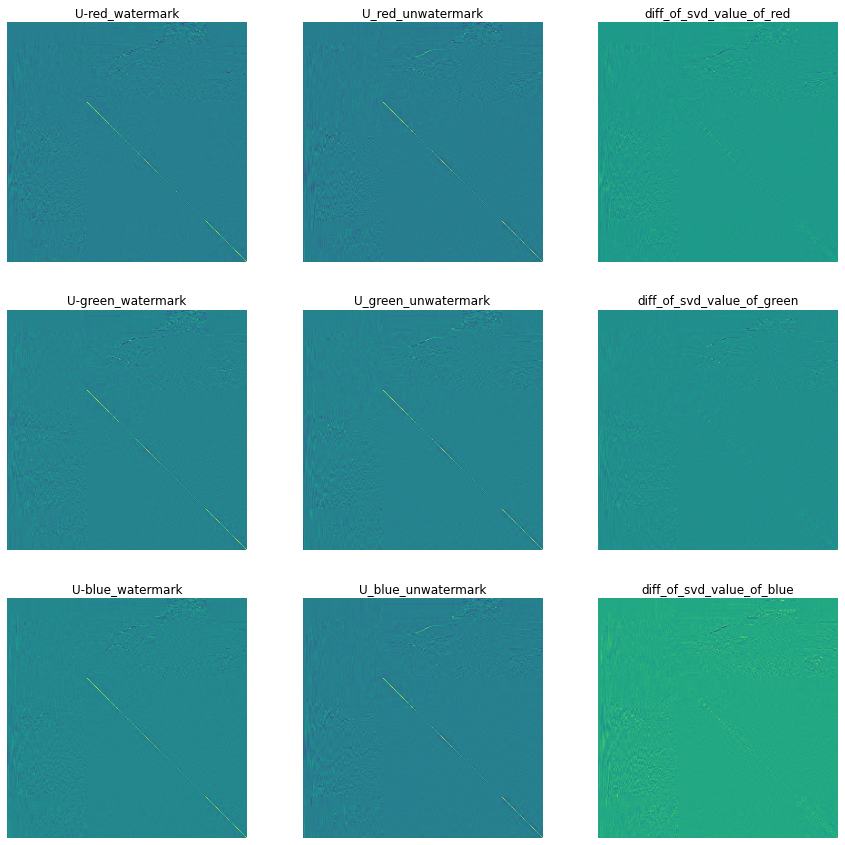

In [30]:
#Subtracting the singular values of watermarked and non-watermarked frame
red_logo = uwr - unwr
green_logo = uwg - unwg
blue_logo = uwb - unwb

lst = [uwr,unwr,red_logo,uwg,unwg,green_logo,uwb,unwb,blue_logo]
name = ["U-red_watermark","U_red_unwatermark","diff_of_svd_value_of_red","U-green_watermark","U_green_unwatermark","diff_of_svd_value_of_green","U-blue_watermark","U_blue_unwatermark","diff_of_svd_value_of_blue",]
fig, axs = plt.subplots(3,3, figsize=(15,15))
c =1
for k in range(len(lst)):
    fig.set_facecolor("white") 
    plt.subplot(3,3,c)
    plt.imshow(lst[k])
    plt.title(str(name[k]))
    plt.axis('off')
    c =c+1 

## [7]  SVD Value Of Original Logo/Watermark Image :

In [31]:
def Original_logo_USVT():
    logo = cv2.imread("LOGO_1.png")
    b2,g2,r2 = cv2.split(logo)
    # 1-level dwt
    LLR3,HHR3 = pywt.dwt(r2,'db1')
    LLG3,HHG3 = pywt.dwt(g2,'db1')
    LLB3,HHB3 = pywt.dwt(b2,'db1')
    # 2-level dwt
    LLR4,HHR4 = pywt.dwt(LLR3,'db1')
    LLG4,HHG4 = pywt.dwt(LLG3,'db1')
    LLB4,HHB4 = pywt.dwt(LLB3,'db1')
    # computing svd values 
    _,sr,vtr = svd(HHR4,full_matrices=True)
    _,sg,vtg = svd(HHG4,full_matrices=True)
    _,sb,vtb = svd(HHB4,full_matrices=True)
    
    return sr,vtr,sg,vtg,sb,vtb,LLR3,HHR3,LLG3,HHG3,LLB3,HHB3,LLR4,HHR4,LLG4,HHG4,LLB4,HHB4

## [8] Applying Inverse SVD And DWT to Reconstruct Watermark :

In [32]:
def InverseSVD_reconstr(u,s,vt):
    m,_ = u.shape
    n,_ = vt.shape
    Sigma = zeros((m,n))
    for i in range(min(m,n)):
        Sigma[i,i] = s[i]
    B = dot(u,dot(Sigma,vt))
    return B

def IDWT_reconstr(a,b,c):
    temp = pywt.idwt(b,a,'db1')
    temp2 = pywt.idwt(temp,c,'db1')
    return temp2

#Get SVD values from original logo file
ur,vtr,ug,vtg,ub,vtb,LLR3,HHR3,LLG3,HHG3,LLB3,HHB3,LLR4,HHR4,LLG4,HHG4,LLB4,HHB4 = Original_logo_USVT()

def Watermark_extraction(r,g,b,sr,vtr,sg,vtg,sb,vtb,LLR3,HHR3,LLG3,HHG3,LLB3,HHB3,LLR4,HHR4,LLG4,HHG4,LLB4,HHB4):
   
    r3 = InverseSVD_reconstr(r,sr,vtr)
    g3 = InverseSVD_reconstr(g,sg,vtg)
    b3 = InverseSVD_reconstr(b,sb,vtb)

    ir = IDWT_reconstr(r3,LLR4,HHR3)
    ig = IDWT_reconstr(g3,LLG4,HHG3)
    ib = IDWT_reconstr(b3,LLB4,HHB3)

    res = cv2.merge((ib,ig,ir)).astype(uint8) # merging reconstructed watermarked image 
    return res

## [9] Reconstructing Watermark :

In [33]:
# Reconstructing the watermark
result = Watermark_extraction(red_logo,green_logo,blue_logo,ur,vtr,ug,vtg,ub,vtb,LLR3,HHR3,LLG3,HHG3,LLB3,HHB3,LLR4,HHR4,LLG4,HHG4,LLB4,HHB4)

## [10] Saving Watermark :

Text(0.5, 1.0, 'Watermark_Extracted image')

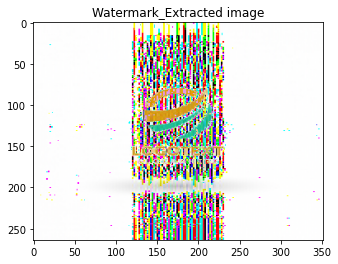

In [35]:
#Saving the watermark
cv2.imwrite(os.path.join(location , 'Watermark_Extracted.png'),result)

fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white") 
plt.imshow(result,cmap=plt.cm.gray)
plt.title("Watermark_Extracted image")